In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
import main
import visualizer
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt

options = webdriver.ChromeOptions()    
driver = webdriver.Remote(
    command_executor='ylenium_driver_1:4444/wd/hub',
    options=options,
)

# main_url = 'https://www.whoscored.com'

url = "https://www.whoscored.com/Matches/1491975/Live/Spain-LaLiga-2020-2021-Barcelona-Villarreal"

match_data = main.getMatchData(driver, url)

matches_df = main.createMatchesDF(match_data)

events_df = main.createEventsDF(match_data)

matchId = match_data['matchId']

home_data = matches_df['home'][matchId]
away_data = matches_df['away'][matchId]

team = 'Barcelona'
teamId = 65
opponent = 'Villarreal'
venue = 'home'

/opt/anaconda3/lib/python3.8/site-packages/mplsoccer/pitch.py:1180: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  sc = ax.scatter(y, x, marker=marker, **kwargs)


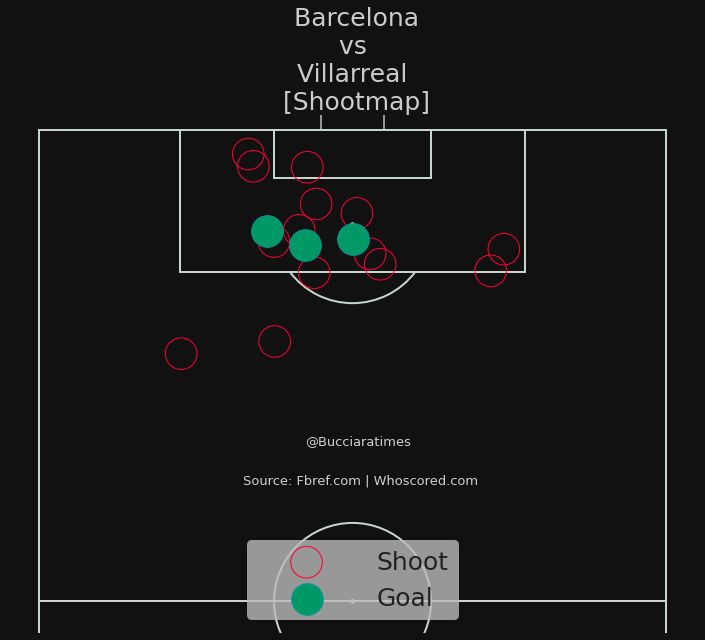

In [2]:
total_shot = events_df.loc[[9 in row for row in list(
                    events_df['satisfiedEventsTypes']
              )]]

team_shot = total_shot[total_shot['teamId']==teamId].reset_index(drop=True)


mask_goal = team_shot['isGoal']
isnotGoal = team_shot[team_shot['isGoal']!=True]
isGoal = team_shot[team_shot['isGoal']!=False]

pitch = Pitch(
    pitch_type='statsbomb',
    orientation='vertical',
    pitch_color='#111111',
    line_color='#c7d5cc',
    figsize=(13.5,9),
    view='half',
    goal_type='box',
    pad_top=2,
    tight_layout=True)

fig, ax = pitch.draw()

plt.gca().invert_xaxis()

pitch.scatter(
    isnotGoal['x'] / 100 * 120,
    isnotGoal['y'] / 100 * 80,
    edgecolors='#FF0033',
    c='',
    s=1000,
    zorder=2,
    label='Shoot',
    ax=ax
)
pitch.scatter(
    team_shot.where(mask_goal)['x'] / 100 * 120,
    team_shot.where(mask_goal)['y'] / 100 * 80,
    edgecolors='#009999',
    c='#009966',
    s=1000,
    zorder=2,
    label='Goal',
    ax=ax
)

ax.set_title(
        f'  {team} \n vs \n {opponent} \n [Shootmap]',
        fontsize=25,
        color='#cccccc'
)

leg = ax.legend(
        facecolor='#bbbbbb',
        edgecolor='None',
        fontsize=25,
        loc='lower center',
        handlelength=4)

leg_texts = leg.get_texts()
leg_texts[0].set_color('#222222')
leg_texts[1].set_color('#222222')
plt.text(46,80, '@Bucciaratimes', color='white',alpha=0.8, fontsize=13) 
plt.text(54,75, 'Source: Fbref.com | Whoscored.com',color='white',alpha=0.8, fontsize=13)

    # Set the figure facecolor
fig.set_facecolor('#111111')

# plt.savefig(f'/work/output/barcelona/eibar_shotmap.png', bbox_inches='tight')


In [24]:
team = 'a a, a, '
a = team.split(sep=",")

In [ ]:
list(filter(None, a))